In [1]:
install.packages("reactable")
library(reactable)
library(ggplot2)
library(tidyverse)
library(broom)
library(dplyr)
library(knitr)
womenwinning_df <- read.csv("officeholders_race_ethnicity.csv")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0
✔ purrr   0.3.4     

Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘broom’ was built under R version 4.0.2”
Warning message:
“package ‘knitr’ was built under R version 4.0.1”


### Intial exploring

In [2]:
head(womenwinning_df)

,id,year,first_name,middle_name,last_name,party,level,position,state,district,race_ethnicity
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,566417k,2017,Kim,K.,Abbott,Democrat,State Legislative,State Representative,Montana - MT,83,White
2,566417k,2018,Kim,K.,Abbott,Democrat,State Legislative,State Representative,Montana - MT,83,White
3,566417k,2019,Kim,K.,Abbott,Democrat,State Legislative,State Representative,Montana - MT,83,White
4,566417k,2020,Kim,K.,Abbott,Democrat,State Legislative,State Representative,Montana - MT,83,White
5,14772c,2010,Robin,A.,Abbott,Democrat,State Legislative,State Representative,Virginia - VA,93,White
6,14772c,2011,Robin,A.,Abbott,Democrat,State Legislative,State Representative,Virginia - VA,93,White


In [3]:
table_of_race <- table(womenwinning_df["race_ethnicity"])
head(table_of_race)


                                     Asian/Pacific Islander 
                                                        634 
                                     Black/African American 
                                                       3695 
                                            Hispanic/Latina 
                                                       1397 
                               Middle Eastern/North African 
                                                         22 
                                                Multiracial 
                                                         15 
Multiracial, Black/African American, Asian/Pacific Islander 
                                                         18 

In [4]:
table_of_levels <- table(womenwinning_df["level"])
head(table_of_levels)


   Federal/Congress   State Legislative Statewide Executive    Territorial/D.C. 
               1381               24540                1017                 112 

In [5]:
table_of_positions <- table(womenwinning_df["position"])
head(table_of_positions)


             Agriculture         Attorney General                  Auditor 
                       9                       98                      106 
 Chief Financial Officer              Comptroller Corporation Commissioner 
                       3                       40                       34 

### Making a dataframe with only the State Legislators

In [6]:
state_leg_df <- womenwinning_df%>%filter(level == "State Legislative")
        
head(state_leg_df)

,id,year,first_name,middle_name,last_name,party,level,position,state,district,race_ethnicity
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,566417k,2017,Kim,K.,Abbott,Democrat,State Legislative,State Representative,Montana - MT,83,White
2,566417k,2018,Kim,K.,Abbott,Democrat,State Legislative,State Representative,Montana - MT,83,White
3,566417k,2019,Kim,K.,Abbott,Democrat,State Legislative,State Representative,Montana - MT,83,White
4,566417k,2020,Kim,K.,Abbott,Democrat,State Legislative,State Representative,Montana - MT,83,White
5,14772c,2010,Robin,A.,Abbott,Democrat,State Legislative,State Representative,Virginia - VA,93,White
6,14772c,2011,Robin,A.,Abbott,Democrat,State Legislative,State Representative,Virginia - VA,93,White


In [7]:
dim(state_leg_df) 

[1] 24540    11

In [8]:
tbl_of_positions2 <- table(state_leg_df["position"])
print(tbl_of_positions2) #checking for cleanness


State Representative        State Senator 
               18620                 5920 


### Looking at Women by State, Year, Race, Region

In [9]:
tbl_by_state <- table(state_leg_df["state"]) #gotta convert this to a string, 
                                             #and then we could do percents too
print(tbl_by_state) #raw number based on location


       Alabama - AL         Alaska - AK        Arizona - AZ       Arkansas - AR 
                262                 218                 428                 369 
    California - CA       Colorado - CO    Connecticut - CT       Delaware - DE 
                425                 542                 729                 202 
       Florida - FL        Georgia - GA           Guam - GU         Hawaii - HI 
                559                 750                  11                 316 
         Idaho - ID       Illinois - IL        Indiana - IN           Iowa - IA 
                392                 763                 423                 466 
        Kansas - KS       Kentucky - KY      Louisiana - LA          Maine - ME 
                596                 325                 280                 770 
      Maryland - MD  Massachusetts - MA       Michigan - MI      Minnesota - MN 
                805                 684                 467                 872 
   Mississippi - MS       M

In [10]:
state_leg_yr <- state_leg_df%>%
    group_by(year) %>%
    summarize(
        count = n())
print(state_leg_yr)

`summarise()` ungrouping output (override with `.groups` argument)



# A tibble: 13 x 2
    year count
   <int> <int>
 1  2008  1782
 2  2009  1839
 3  2010  1844
 4  2011  1786
 5  2012  1778
 6  2013  1828
 7  2014  1829
 8  2015  1846
 9  2016  1828
10  2017  1893
11  2018  1914
12  2019  2169
13  2020  2204


In [11]:
state_leg_race <- state_leg_df%>%
    group_by(race_ethnicity == "White") %>%
    summarize(count = n())
print(state_leg_race)

`summarise()` ungrouping output (override with `.groups` argument)



# A tibble: 2 x 2
  `race_ethnicity == "White"` count
  <lgl>                       <int>
1 FALSE                        5483
2 TRUE                        19057


In [12]:
state_leg_race <- state_leg_df%>%       #it's a little weird that "White" doesn't come up here?
group_by(race_ethnicity) %>%
    summarize(count = n())
print(state_leg_race)

`summarise()` ungrouping output (override with `.groups` argument)



# A tibble: 21 x 2
   race_ethnicity                                              count
   <chr>                                                       <int>
 1 Asian/Pacific Islander                                        497
 2 Black/African American                                       3412
 3 Hispanic/Latina                                              1181
 4 Middle Eastern/North African                                   18
 5 Multiracial                                                    13
 6 Multiracial, Black/African American, Asian/Pacific Islander     2
 7 Multiracial, Black/African American, Hispanic/Latina           13
 8 Multiracial, Black/African American, Native American           13
 9 Multiracial, Hispanic/Latina, Asian/Pacific Islander           15
10 Multiracial, Hispanic/Latina, Native American                  10
# … with 11 more rows


In [13]:
head(state_leg_df)

,id,year,first_name,middle_name,last_name,party,level,position,state,district,race_ethnicity
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,566417k,2017,Kim,K.,Abbott,Democrat,State Legislative,State Representative,Montana - MT,83,White
2,566417k,2018,Kim,K.,Abbott,Democrat,State Legislative,State Representative,Montana - MT,83,White
3,566417k,2019,Kim,K.,Abbott,Democrat,State Legislative,State Representative,Montana - MT,83,White
4,566417k,2020,Kim,K.,Abbott,Democrat,State Legislative,State Representative,Montana - MT,83,White
5,14772c,2010,Robin,A.,Abbott,Democrat,State Legislative,State Representative,Virginia - VA,93,White
6,14772c,2011,Robin,A.,Abbott,Democrat,State Legislative,State Representative,Virginia - VA,93,White


In [14]:
states_northeast <- c("Connecticut - CT", "Delaware - DE", "Maine - ME", "Massachusetts - MA",
                      "New Hampshire - NH", "New Jersey - NJ", "New York - NY", "Pennsylvania - PA", 
                      "Rhode Island - RI", "Vermont - VT")
states_west <- c("Alaska - AK", "Arizona - AZ", "California - CA", "Colorado - CO", "Hawaii - HI", "Idaho - ID", "Nevada - NV", "Montana - MT",
                 "New Mexico - NM", "Oregon - OR", "Washington - WA", "Wyoming - WY")
states_midwest <- c("Indiana - IN", "Illinois - IL", "Iowa - IA", "Kansas - KS", "Michigan - MI", "Minnesota - MN", "Missouri - MO", 
                    "Nebraska - NE", "North Dakota - ND", "Ohio - OH", "South Dakota - SD", "Wisconsin - WI")
states_south <- c("Alabama - AL", "Arkansas - AR", 
                  "Florida - FL", "Georgia - GA", "Kentucky - KY", "Louisiana - LA", "Maryland - MD", "Mississippi - MS", 
                  "North Carolina - NC", "Oklahoma - OK", "South Carolina - SC", "Tennessee - TN", "Texas - TX", 
                  "Virginia - VA", "West Virginia - WV")


# Replace "dataset" with name of your dataset
state_leg_df <- state_leg_df %>%
  mutate(region = case_when(state %in% states_northeast ~ "Northeast",
                            state %in% states_west ~ "West",
                            state %in% states_midwest ~ "Midwest",
                            state %in% states_south ~ "South",
                            TRUE ~ "Other"))

head(state_leg_df)

,id,year,first_name,middle_name,last_name,party,level,position,state,district,race_ethnicity,region
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,566417k,2017,Kim,K.,Abbott,Democrat,State Legislative,State Representative,Montana - MT,83,White,West
2,566417k,2018,Kim,K.,Abbott,Democrat,State Legislative,State Representative,Montana - MT,83,White,West
3,566417k,2019,Kim,K.,Abbott,Democrat,State Legislative,State Representative,Montana - MT,83,White,West
4,566417k,2020,Kim,K.,Abbott,Democrat,State Legislative,State Representative,Montana - MT,83,White,West
5,14772c,2010,Robin,A.,Abbott,Democrat,State Legislative,State Representative,Virginia - VA,93,White,South
6,14772c,2011,Robin,A.,Abbott,Democrat,State Legislative,State Representative,Virginia - VA,93,White,South


In [15]:
state_leg_region <- state_leg_df%>%
    group_by(region) %>%
    summarize(count = n())
print(state_leg_region)

`summarise()` ungrouping output (override with `.groups` argument)



# A tibble: 5 x 2
  region    count
  <chr>     <int>
1 Midwest    5808
2 Northeast  7313
3 Other       286
4 South      6285
5 West       4848


In [16]:
state_leg_party <- state_leg_df%>%
    group_by(state, year)%>%
    summarize(
    prop_dem = mean(party == "Democrat"),
    count = n())
head(state_leg_party)

`summarise()` regrouping output by 'state' (override with `.groups` argument)



state,year,prop_dem,count
<chr>,<int>,<dbl>,<int>
Alabama - AL,2008,0.7777778,18
Alabama - AL,2009,0.8000000,20
Alabama - AL,2010,0.7894737,19
Alabama - AL,2011,0.6842105,19
Alabama - AL,2012,0.6842105,19
Alabama - AL,2013,0.6842105,19


In [17]:

state_leg_party_2016 <- state_leg_df%>%
    filter(year > 2015)%>%
    group_by(state, year)%>%
    summarize(
    prop_white = mean(race_ethnicity == "White"),
    prop_dem = mean(party == "Democrat"),
    count = n())
head(state_leg_party_2016)

`summarise()` regrouping output by 'state' (override with `.groups` argument)



state,year,prop_white,prop_dem,count
<chr>,<int>,<dbl>,<dbl>,<int>
Alabama - AL,2016,0.4000000,0.7000000,20
Alabama - AL,2017,0.3809524,0.7142857,21
Alabama - AL,2018,0.3809524,0.7142857,21
Alabama - AL,2019,0.3478261,0.6521739,23
Alabama - AL,2020,0.3478261,0.6521739,23
Alaska - AK,2016,0.8823529,0.1764706,17


In [18]:
print(kable(state_leg_party_2016))



|state               | year| prop_white|  prop_dem| count|
|:-------------------|----:|----------:|---------:|-----:|
|Alabama - AL        | 2016|  0.4000000| 0.7000000|    20|
|Alabama - AL        | 2017|  0.3809524| 0.7142857|    21|
|Alabama - AL        | 2018|  0.3809524| 0.7142857|    21|
|Alabama - AL        | 2019|  0.3478261| 0.6521739|    23|
|Alabama - AL        | 2020|  0.3478261| 0.6521739|    23|
|Alaska - AK         | 2016|  0.8823529| 0.1764706|    17|
|Alaska - AK         | 2017|  0.9444444| 0.2222222|    18|
|Alaska - AK         | 2018|  0.8947368| 0.2631579|    19|
|Alaska - AK         | 2019|  0.8695652| 0.3043478|    23|
|Alaska - AK         | 2020|  0.8695652| 0.3043478|    23|
|Arizona - AZ        | 2016|  0.7272727| 0.5454545|    33|
|Arizona - AZ        | 2017|  0.6666667| 0.5277778|    36|
|Arizona - AZ        | 2018|  0.6756757| 0.5135135|    37|
|Arizona - AZ        | 2019|  0.6571429| 0.6000000|    35|
|Arizona - AZ        | 2020|  0.6571429| 0.6000000|   

In [19]:
state_leg_region_2016 <- state_leg_df%>%
    filter(year > 2015)%>%
    group_by(region, year)%>%
    summarize(
    prop_white = mean(race_ethnicity == "White"),
    prop_dem = mean(party == "Democrat"),
    count = n())
head(state_leg_region_2016)

`summarise()` regrouping output by 'region' (override with `.groups` argument)



region,year,prop_white,prop_dem,count
<chr>,<int>,<dbl>,<dbl>,<int>
Midwest,2016,0.8352403,0.5537757,437
Midwest,2017,0.8351893,0.5167038,449
Midwest,2018,0.8318584,0.5176991,452
Midwest,2019,0.8070866,0.5846457,508
Midwest,2020,0.8058824,0.5921569,510
Northeast,2016,0.8613678,0.6691312,541


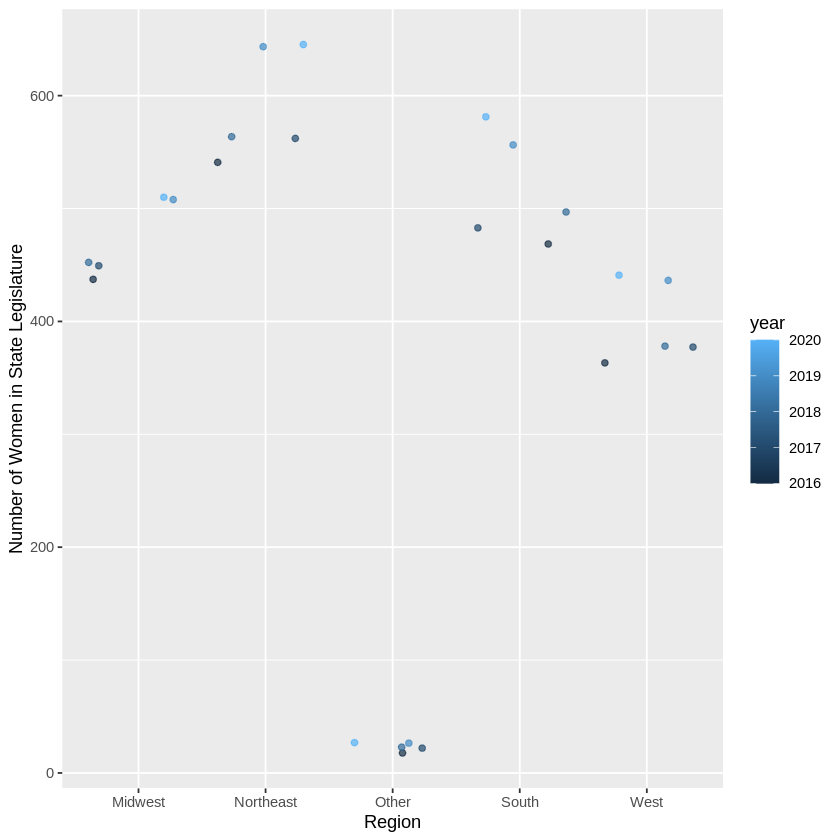

In [20]:
ggplot(state_leg_region_2016, aes(x = region, y = count, colour = year)) +
        geom_jitter(alpha=0.7)+
        xlab("Region") +
        ylab("Number of Women in State Legislature")
